In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [114]:
df= pd.read_csv("student_data.csv")
pd.set_option('display.max_columns',None)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


### Converting Object to Category datatype

In [115]:
def categorycol(*col):
    lst_col= list(col)
    for m in lst_col:
        df[m]=df[m].astype('category')

In [116]:
categorycol('school','sex','address','famsize','Pstatus','Mjob','Fjob','paid','activities','internet','romantic','schoolsup','famsup','higher')

### Finding average marks

In [117]:
df['sum']= df[['G1','G2','G3']].sum(axis=1)
df['avg_score_%']=((df['sum'])/60)*100
df['avg_score_%']=df['avg_score_%'].round()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sum,avg_score_%
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,22,37.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,31,52.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,37,62.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,42,70.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,37,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,31,52.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,46,77.0
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,32,53.0
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,30,50.0


Text(0, 0.5, 'Study Time')

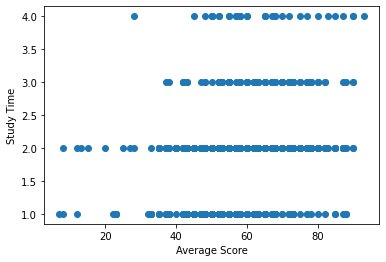

In [118]:
x=df['avg_score_%']
y=df['studytime']
plt.scatter(x,y)
plt.show
plt.xlabel("Average Score")
plt.ylabel("Study Time")


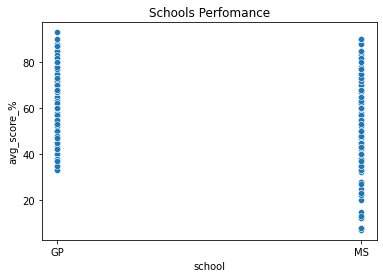

In [119]:
sns.scatterplot(x=df['school'], y=df['avg_score_%']);

plt.title("Schools Perfomance");

### Defing scores

In [120]:
def grade_system(score):
    if score >= 90: return "A+"
    elif score >= 85: return "A"
    elif score >= 80: return "A-"
    elif score >= 75: return "B+"
    elif score >= 70: return "B"
    elif score >= 65: return "B-"
    elif score >= 60: return "C+"
    elif score >= 55: return "C"
    elif score >= 50: return "C-"
    elif score >= 45: return "D+"
    elif score >= 40: return "D"
    elif score >= 35: return "D-"
    else: return "F"
    
df["grade"] = df["avg_score_%"].apply(grade_system)

In [121]:
def pf(a):
    if a>=40:
        return 'Passed'
    else:
        return 'Failed'

df["status"] = df["avg_score_%"].map(pf)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sum,avg_score_%,grade,status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,22,37.0,D-,Failed
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,31,52.0,C-,Passed
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,37,62.0,C+,Passed
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,42,70.0,B,Passed
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,37,62.0,C+,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,31,52.0,C-,Passed
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,46,77.0,B+,Passed
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,32,53.0,C-,Passed
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,30,50.0,C-,Passed


### Data cleaning and mapping

In [122]:
df.drop(['address','famsize','reason','guardian','nursery','school','Dalc','Walc','age','Mjob','Fjob','Medu','Fedu'], axis=1,inplace= True)

In [123]:
gender_map = {"M":0, "F": 1}
df["sex"] = df["sex"].map(gender_map)

In [124]:
status_map = {"Passed":1, "Failed": 0}
df["status"] = df["status"].map(status_map)

In [125]:
stat_map = {"A":0, "T": 1}
df["Pstatus"] = df["Pstatus"].map(stat_map)

In [126]:
d = {"no":0, "yes": 1}
df["paid"] = df["paid"].map(d)
df["activities"] = df["activities"].map(d)
df['romantic'] = df["romantic"].map(d)
df['internet'] = df["internet"].map(d)
df['schoolsup'] = df["schoolsup"].map(d)
df['famsup'] = df["famsup"].map(d)
df['higher'] = df["higher"].map(d)


In [127]:
df

,sex,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,sum,avg_score_%,grade,status
0,1,0,2,2,0,1,0,0,0,1,0,0,4,3,4,3,4,0,11,11,22,37.0,D-,0
1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,3,2,9,11,11,31,52.0,C-,1
2,1,1,1,2,0,1,0,0,0,1,1,0,4,3,2,3,6,12,13,12,37,62.0,C+,1
3,1,1,1,3,0,0,1,0,1,1,1,1,3,2,2,5,0,14,14,14,42,70.0,B,1
4,1,1,1,2,0,0,1,0,0,1,0,0,4,3,2,5,0,11,13,13,37,62.0,C+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,1,3,1,0,0,0,1,1,1,0,5,4,2,5,4,10,11,10,31,52.0,C-,1
645,1,1,1,2,0,0,1,0,0,1,1,0,4,3,4,1,4,15,15,16,46,77.0,B+,1
646,1,1,2,2,0,0,0,0,1,1,0,0,1,1,1,5,6,11,12,9,32,53.0,C-,1
647,0,1,2,1,0,0,0,0,0,1,1,0,2,4,5,2,6,10,10,10,30,50.0,C-,1


### Applying ML Algorthims For prediction

In [128]:
ml_students_df =df.copy()

In [129]:
ml_students_df.drop(['G1','G2','G3','avg_score_%','sum','grade'],axis=1,inplace=True)

In [130]:
ml_students_df

,sex,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,status
0,1,0,2,2,0,1,0,0,0,1,0,0,4,3,4,3,4,0
1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,3,2,1
2,1,1,1,2,0,1,0,0,0,1,1,0,4,3,2,3,6,1
3,1,1,1,3,0,0,1,0,1,1,1,1,3,2,2,5,0,1
4,1,1,1,2,0,0,1,0,0,1,0,0,4,3,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,1,3,1,0,0,0,1,1,1,0,5,4,2,5,4,1
645,1,1,1,2,0,0,1,0,0,1,1,0,4,3,4,1,4,1
646,1,1,2,2,0,0,0,0,1,1,0,0,1,1,1,5,6,1
647,0,1,2,1,0,0,0,0,0,1,1,0,2,4,5,2,6,1


In [131]:
X=ml_students_df.drop(['status'],axis=1)
y=ml_students_df['status']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

## KNN

In [133]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

print(knn.predict(X_test))

0.9230769230769231
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Naive Bayes

In [134]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(gnb.score(X_test,y_test))

Gaussian Naive Bayes model accuracy(in %): 86.92307692307692
0.8692307692307693


## Logistic Regression

In [135]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [136]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
lr.score(X_test,y_test)

0.9230769230769231